In [1]:
from keras.models import Model
from keras.layers import Input, Conv3D, MaxPooling3D, concatenate, Conv3DTranspose, BatchNormalization, Dropout, Lambda
from keras.optimizers import Adam
from keras.metrics import MeanIoU
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers, regularizers, initializers

kernel_initializer =  'he_normal' 


################################################################
def simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS, num_classes):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs

    #Contraction path
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1=BatchNormalization()(c1)
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c1)
    p1 = MaxPooling3D((2, 2, 2))(c1)
    
    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2=BatchNormalization()(c2)
    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c2)
    p2 = MaxPooling3D((2, 2, 2))(c2)
     
    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3=BatchNormalization()(c3)
    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c3)
    p3 = MaxPooling3D((2, 2, 2))(c3)
     
    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4=BatchNormalization()(c4)
    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c4)
    p4 = MaxPooling3D(pool_size=(2, 2, 2))(c4)
     
    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5=BatchNormalization()(c5)
    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c5)
    
    #Expansive path 
    u6 = Conv3DTranspose(128, (2, 2, 2), strides=(2, 2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6=BatchNormalization()(c6)
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c6)
     
    u7 = Conv3DTranspose(64, (2, 2, 2), strides=(2, 2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7=BatchNormalization()(c7)
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c7)
     
    u8 = Conv3DTranspose(32, (2, 2, 2), strides=(2, 2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8=BatchNormalization()(c8)
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c8)
     
    u9 = Conv3DTranspose(16, (2, 2, 2), strides=(2, 2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9=BatchNormalization()(c9)
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c9)
     
    outputs = Conv3D(num_classes, (1, 1, 1), activation='softmax',kernel_initializer='glorot_uniform')(c9)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    #compile model outside of this function to make it flexible. 
    model.summary()
    
    return model

#Test if everything is working ok. 
model = simple_unet_model(128, 128, 128, 3, 4)
print(model.input_shape)
print(model.output_shape)
#made changes in model architecure and tune hyper parameters,use early stopping and earning rate scheduler
# GlorotUniform()

2024-11-10 13:00:15.153304: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-10 13:00:15.166781: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-10 13:00:15.170774: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-10 13:00:15.181583: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-10 13:00:15.967174: W tensorflow/compiler/tf2

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 128, 3)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d (Conv3D)     │ (None, 128, 128,  │      1,312 │ input_layer[0][0] │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128, 128,  │          0 │ conv3d[0][0]      │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 128, 128,  │         64 │ dropout[0][0]     │
│ (BatchNormalizatio… │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_1 (Conv3D)   │ (None, 128, 128,  │      6,928 │ batch_normalizat… │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d       │ (None, 64, 64,    │          0 │ conv3d_1[0][0]    │
│ (MaxPooling3D)      │ 64, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_2 (Conv3D)   │ (None, 64, 64,    │     13,856 │ max_pooling3d[0]… │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64, 64,    │          0 │ conv3d_2[0][0]    │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        128 │ dropout_1[0][0]   │
│ (BatchNormalizatio… │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_3 (Conv3D)   │ (None, 64, 64,    │     27,680 │ batch_normalizat… │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_1     │ (None, 32, 32,    │          0 │ conv3d_3[0][0]    │
│ (MaxPooling3D)      │ 32, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_4 (Conv3D)   │ (None, 32, 32,    │     55,360 │ max_pooling3d_1[… │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 32, 32,    │          0 │ conv3d_4[0][0]    │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ dropout_2[0][0]   │
│ (BatchNormalizatio… │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_5 (Conv3D)   │ (None, 32, 32,    │    110,656 │ batch_normalizat… │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_2     │ (None, 16, 16,    │          0 │ conv3d_5[0][0]    │
│ (MaxPooling3D)      │ 16, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_6 (Conv3D)   │ (None, 16, 16,    │    221,312 │ max_pooling3d_2[

 Total params: 5,648,772 (21.55 MB)

 Trainable params: 5,647,300 (21.54 MB)

 Non-trainable params: 1,472 (5.75 KB)

(None, 128, 128, 128, 3)
(None, 128, 128, 128, 4)


In [2]:
import os
import numpy as np


def load_img(img_dir, img_list):
    images=[]
    for i, image_name in enumerate(img_list):    
        if (image_name.split('.')[1] == 'npy'):
            
            image = np.load(img_dir+image_name)
                      
            images.append(image)
    images = np.array(images)
    
    return(images)

In [3]:


def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size):

    L = len(img_list)

    #keras needs the generator infinite, so we will use while true  
    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)
                       
            X = load_img(img_dir, img_list[batch_start:limit])
            Y = load_img(mask_dir, mask_list[batch_start:limit])

            yield (X,Y) #a tuple with two numpy arrays with batch_size samples     

            batch_start += batch_size   
            batch_end += batch_size
#try finding for class imbalance and use data agumentation ---if used any pretrainde as backbone use preprocessing step 

In [4]:
train_img_dir = "BraTS2020_TrainingData/input_data_128/train/images/"
train_mask_dir = "BraTS2020_TrainingData/input_data_128/train/masks/"

val_img_dir = "BraTS2020_TrainingData/input_data_128/val/images/"
val_mask_dir = "BraTS2020_TrainingData/input_data_128/val/masks/"

train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

val_img_list=os.listdir(val_img_dir)
val_mask_list = os.listdir(val_mask_dir)

In [5]:
batch_size = 1
import random

train_img_datagen = imageLoader(train_img_dir, train_img_list, 
                                train_mask_dir, train_mask_list, batch_size)

val_img_datagen = imageLoader(val_img_dir, val_img_list, 
                                val_mask_dir, val_mask_list, batch_size)

#Verify generator.... In python 3 next() is renamed as __next__()
img, msk = train_img_datagen.__next__()

img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

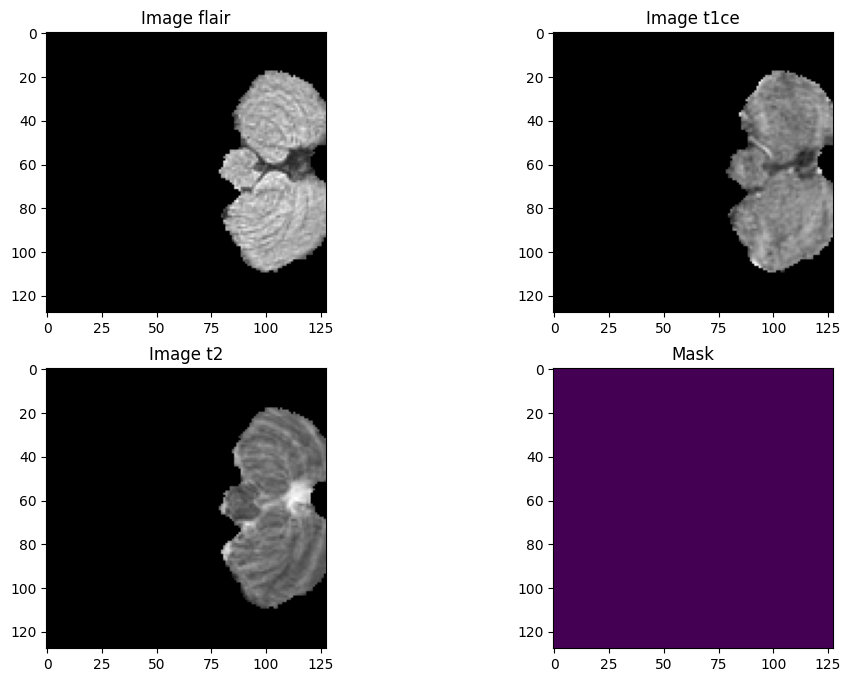

In [6]:
import matplotlib.pyplot as plt
n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [7]:
import tensorflow as tf

# Define step decay function
def step_decay(epoch):
    initial_lr = 0.01  # starting learning rate
    drop_rate = 0.5    # factor to multiply by at each step
    epochs_drop = 10   # how often to drop (every 10 epochs in this case)
    lr = initial_lr * (drop_rate ** (epoch // epochs_drop))
    return lr

# Add the step decay scheduler as a callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(step_decay)



In [8]:
import tensorflow as tf

def IOUScore_3D(gt, pr):
    """
    Calculate the IoU score for 3D volumetric data.

    Args:
    gt (Tensor): Ground truth volume, shape = (depth, height, width) or (batch_size, depth, height, width).
    pr (Tensor): Predicted volume, shape = (depth, height, width) or (batch_size, depth, height, width).

    Returns:
    Tensor: IoU score for the 3D volume.
    """
    gt = tf.cast(gt, tf.float32)  # Ensure ground truth is float32
    pr = tf.cast(pr, tf.float32)  # Ensure predictions are float32

    # Calculate intersection and union across all spatial dimensions (depth, height, width)
    intersection = tf.reduce_sum(gt * pr, axis=[-3, -2, -1])
    union = tf.reduce_sum(gt, axis=[-3, -2, -1]) + tf.reduce_sum(pr, axis=[-3, -2, -1]) - intersection

    # Calculate IoU for each volume in the batch and return mean IoU
    iou = intersection / (union + 1e-6)
    return tf.reduce_mean(iou)

In [9]:
import tensorflow as tf

def dice_coefficient(y_true, y_pred, threshold=0.5, smooth=1e-6):
    """
    Calculate Dice coefficient for 3D segmentation.
     
    Args:
        y_true (tf.Tensor): Ground truth labels (binary mask) for a 3D image.
        y_pred (tf.Tensor): Predicted labels for a 3D image.
        threshold (float): Threshold to binarize the predictions.
        smooth (float): Small value to avoid division by zero.
    
    Returns:
        tf.Tensor: Dice coefficient score.
    """
    # Ensure both y_true and y_pred are of type float32
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred > threshold, tf.float32)
    
    # Compute intersection and union over all spatial dimensions (e.g., depth, height, width)
    intersection = tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    
    # Compute Dice coefficient
    dice = (2.0 * intersection + smooth) / (denominator + smooth)
    return dice

In [10]:
#Define loss, metrics and optimizer to be used for training
wt0, wt1, wt2, wt3 = 0.25,0.25,0.25,0.25
import segmentation_models_3D as sm
dice_loss = sm.losses.DiceLoss() 
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

from keras.metrics import MeanIoU

num_classes = 4  # Replace with your number of classes
mean_iou_metric = MeanIoU(num_classes=num_classes)
# metrics = ['accuracy',iou_metric]


metrics = ['accuracy',mean_iou_metric,IOUScore_3D,dice_coefficient]

initial_lr = 0.01
optimizer = keras.optimizers.Adam(learning_rate=initial_lr)#try changing optimizer,use data agumentation,re run on present evaluation metrics,try using reduceLrOnPlatue,retrain again on 50 more epochs and cheak scores and graphs

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

print(model.input_shape)
print(model.output_shape)

Segmentation Models: using `keras` framework.
(None, 128, 128, 128, 3)
(None, 128, 128, 128, 4)


In [11]:
steps_per_epoch = len(train_img_list)//batch_size
val_steps_per_epoch = len(val_img_list)//batch_size


# from  simple_3d_unet import simple_unet_model

model = simple_unet_model(IMG_HEIGHT=128, 
                          IMG_WIDTH=128, 
                          IMG_DEPTH=128, 
                          IMG_CHANNELS=3, 
                          num_classes=4)

model.compile(optimizer = optimizer, loss=total_loss, metrics=metrics)
# print(model.summary())

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 128, 3)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_19 (Conv3D)  │ (None, 128, 128,  │      1,312 │ input_layer_1[0]… │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 128, 128,  │          0 │ conv3d_19[0][0]   │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │         64 │ dropout_9[0][0]   │
│ (BatchNormalizatio… │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_20 (Conv3D)  │ (None, 128, 128,  │      6,928 │ batch_normalizat… │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_4     │ (None, 64, 64,    │          0 │ conv3d_20[0][0]   │
│ (MaxPooling3D)      │ 64, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_21 (Conv3D)  │ (None, 64, 64,    │     13,856 │ max_pooling3d_4[… │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 64, 64,    │          0 │ conv3d_21[0][0]   │
│ (Dropout)           │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        128 │ dropout_10[0][0]  │
│ (BatchNormalizatio… │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_22 (Conv3D)  │ (None, 64, 64,    │     27,680 │ batch_normalizat… │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_5     │ (None, 32, 32,    │          0 │ conv3d_22[0][0]   │
│ (MaxPooling3D)      │ 32, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_23 (Conv3D)  │ (None, 32, 32,    │     55,360 │ max_pooling3d_5[… │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 32, 32,    │          0 │ conv3d_23[0][0]   │
│ (Dropout)           │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ dropout_11[0][0]  │
│ (BatchNormalizatio… │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_24 (Conv3D)  │ (None, 32, 32,    │    110,656 │ batch_normalizat… │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_6     │ (None, 16, 16,    │          0 │ conv3d_24[0][0]   │
│ (MaxPooling3D)      │ 16, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_25 (Conv3D)  │ (None, 16, 16,    │    221,312 │ max_pooling3d_6[

 Total params: 5,648,772 (21.55 MB)

 Trainable params: 5,647,300 (21.54 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [12]:
print(model.input_shape)
print(model.output_shape)
import tensorflow as tf
callbacks = [early_stopping, lr_scheduler]


history=model.fit(train_img_datagen,
          steps_per_epoch=steps_per_epoch,
          epochs=200,
          verbose=1,
          validation_data=val_img_datagen,
        #   validation_steps=val_steps_per_epoch,
          callbacks=callbacks
          )

(None, 128, 128, 128, 3)
(None, 128, 128, 128, 4)
Epoch 1/200


I0000 00:00:1731243645.868267   82932 service.cc:146] XLA service 0x7fbc28001ec0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731243645.868312   82932 service.cc:154]   StreamExecutor device (0): NVIDIA L40S, Compute Capability 8.9
2024-11-10 13:00:46.077944: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-10 13:00:46.863236: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8902
2024-11-10 13:00:48.041735: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 144.00MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-11-10 13:00:48.064779: W tensorflow/core/framework/op_kernel.cc:1840] OP_REQUIRES failed at 

UnknownError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 737, in start

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 524, in dispatch_queue

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 513, in process_one

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 418, in dispatch_shell

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 758, in execute_request

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 426, in do_execute

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3046, in run_cell

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3101, in _run_cell

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3306, in run_cell_async

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3488, in run_ast_nodes

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3548, in run_code

  File "/tmp/ipykernel_82650/2881649668.py", line 7, in <module>

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 314, in fit

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 117, in one_step_on_iterator

Failed to determine best cudnn convolution algorithm for:
%cudnn-conv-bias-activation.58 = (f32[1,16,128,128,128]{4,3,2,1,0}, u8[0]{0}) custom-call(f32[1,16,128,128,128]{4,3,2,1,0} %add.1670, f32[16,16,3,3,3]{4,3,2,1,0} %transpose.257, f32[16]{0} %arg10.11), window={size=3x3x3 pad=1_1x1_1x1_1}, dim_labels=bf012_oi012->bf012, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv3D" op_name="functional_3_1/conv3d_20_1/convolution" source_file="/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/tensorflow/python/framework/ops.py" source_line=1177}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}

Original error: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 150994944 bytes.

To ignore this failure and try to use a fallback algorithm (which may have suboptimal performance), use XLA_FLAGS=--xla_gpu_strict_conv_algorithm_picker=false.  Please also file a bug for the root cause of failing autotuning.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_one_step_on_iterator_14166]

In [ ]:
#plot the training and validation IoU and loss at each epoch
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
# from keras.metrics import MeanIoU
batch_size=1 #Check IoU for a batch of images
test_img_datagen = imageLoader(val_img_dir, val_img_list, 
                                val_mask_dir, val_mask_list, batch_size)

In [14]:
steps = len(val_img_list) // batch_size
evaluation_results = model.evaluate(test_img_datagen)

print(f'Evaluation results: {evaluation_results}')

E0000 00:00:1731243655.237003   82932 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1731243655.325814   82932 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2024-11-10 13:00:55.342594: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 144.00MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-11-10 13:00:55.350276: W tensorflow/core/framework/op_kernel.cc:1840] OP_REQUIRES failed at xla_ops.cc:577 : UNKNOWN: Failed to determine best cudnn convolution algorithm for:
%cudnn-conv-bias-activation.58 = (f32[1,16,128,128,128]{4,3,2,1,0}, u8[0]{0}) custom-call(f32[1,16,128,128,1

UnknownError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 737, in start

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 524, in dispatch_queue

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 513, in process_one

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 418, in dispatch_shell

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 758, in execute_request

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 426, in do_execute

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3046, in run_cell

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3101, in _run_cell

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3306, in run_cell_async

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3488, in run_ast_nodes

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3548, in run_code

  File "/tmp/ipykernel_82650/2340358848.py", line 2, in <module>

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 425, in evaluate

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 161, in one_step_on_iterator

Failed to determine best cudnn convolution algorithm for:
%cudnn-conv-bias-activation.58 = (f32[1,16,128,128,128]{4,3,2,1,0}, u8[0]{0}) custom-call(f32[1,16,128,128,128]{4,3,2,1,0} %add.49, f32[16,16,3,3,3]{4,3,2,1,0} %transpose.33, f32[16]{0} %arg9.10), window={size=3x3x3 pad=1_1x1_1x1_1}, dim_labels=bf012_oi012->bf012, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv3D" op_name="functional_3_1/conv3d_20_1/convolution" source_file="/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/tensorflow/python/framework/ops.py" source_line=1177}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}

Original error: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 150994944 bytes.

To ignore this failure and try to use a fallback algorithm (which may have suboptimal performance), use XLA_FLAGS=--xla_gpu_strict_conv_algorithm_picker=false.  Please also file a bug for the root cause of failing autotuning.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_one_step_on_iterator_15161]

In [ ]:
model.save('brats_3dfinal.hdf5')


In [ ]:
from keras.models import load_model
my_model = load_model('brats_3dfinal.hdf5', 
                      compile=False)


In [ ]:
from keras.metrics import MeanIoU

batch_size=8 #Check IoU for a batch of images
test_img_datagen = imageLoader(val_img_dir, val_img_list, 
                                val_mask_dir, val_mask_list, batch_size)

#Verify generator.... In python 3 next() is renamed as __next__()
test_image_batch, test_mask_batch = test_img_datagen.__next__()

test_mask_batch_argmax = np.argmax(test_mask_batch, axis=4)
test_pred_batch = my_model.predict(test_image_batch)
test_pred_batch_argmax = np.argmax(test_pred_batch, axis=4)


In [ ]:
import tensorflow as tf

def dice_coefficient(y_true, y_pred, threshold=0.5, smooth=1e-6):
    """
    Calculate Dice coefficient for 3D segmentation.
     
    Args:
        y_true (tf.Tensor): Ground truth labels (binary mask) for a 3D image.
        y_pred (tf.Tensor): Predicted labels for a 3D image.
        threshold (float): Threshold to binarize the predictions.
        smooth (float): Small value to avoid division by zero.
    
    Returns:
        tf.Tensor: Dice coefficient score.
    """
    # Ensure both y_true and y_pred are of type float32
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred > threshold, tf.float32)
    
    # Compute intersection and union over all spatial dimensions (e.g., depth, height, width)
    intersection = tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    
    # Compute Dice coefficient
    dice = (2.0 * intersection + smooth) / (denominator + smooth)
    return dice

In [ ]:
score2=dice_coefficient(test_pred_batch_argmax, test_mask_batch_argmax)
print(score2)

In [ ]:
import tensorflow as tf

def IOUScore_3D(gt, pr):
    """
    Calculate the IoU score for 3D volumetric data.

    Args:
    gt (Tensor): Ground truth volume, shape = (depth, height, width) or (batch_size, depth, height, width).
    pr (Tensor): Predicted volume, shape = (depth, height, width) or (batch_size, depth, height, width).

    Returns:
    Tensor: IoU score for the 3D volume.
    """
    gt = tf.cast(gt, tf.float32)  # Ensure ground truth is float32
    pr = tf.cast(pr, tf.float32)  # Ensure predictions are float32

    # Calculate intersection and union across all spatial dimensions (depth, height, width)
    intersection = tf.reduce_sum(gt * pr, axis=[-3, -2, -1])
    union = tf.reduce_sum(gt, axis=[-3, -2, -1]) + tf.reduce_sum(pr, axis=[-3, -2, -1]) - intersection

    # Calculate IoU for each volume in the batch and return mean IoU
    iou = intersection / (union + 1e-6)
    return tf.reduce_mean(iou)

In [ ]:
score=IOUScore_3D(test_pred_batch_argmax, test_mask_batch_argmax)
print(score)

In [ ]:
n_classes = 4
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(test_pred_batch_argmax, test_mask_batch_argmax)
print("Mean IoU =", IOU_keras.result().numpy())


In [ ]:
img_num = 82
import numpy as np

test_img = np.load("BraTS2020_TrainingData/input_data_128/val/images/image_"+str(img_num)+".npy")

test_mask = np.load("BraTS2020_TrainingData/input_data_128/val/masks/mask_"+str(img_num)+".npy")
test_mask_argmax=np.argmax(test_mask, axis=3)

test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = my_model.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]


print(test_prediction_argmax.shape)
print(test_mask_argmax.shape)
print(np.unique(test_prediction))
print(np.unique(test_prediction_argmax))


In [ ]:
#Plot individual slices from test predictions for verification
from matplotlib import pyplot as plt
import random

#n_slice=random.randint(0, test_prediction_argmax.shape[2])
n_slice = 57
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,n_slice,1], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(test_mask_argmax[:,:,n_slice])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction_argmax[:,:, n_slice])
plt.show()

In [ ]:
giiiii

In [ ]:
from keras.models import load_model

#Load model for prediction or continue training

#For continuing training....
#The following gives an error: Unknown loss function: dice_loss_plus_1focal_loss
#This is because the model does not save loss function and metrics. So to compile and 


#So let us add the loss as custom object... but the following throws another error...
#Unknown metric function: iou_score
my_model = load_model('/teamspace/studios/this_studio/brats_3d444.hdf5', 
                      custom_objects={'dice_loss_plus_1focal_loss': total_loss})

#Now, let us add the iou_score function we used during our initial training


#Now all set to continue the training process. 
history2=my_model.fit(train_img_datagen,
          steps_per_epoch=steps_per_epoch,
          epochs=30,
          verbose=1,
          validation_data=val_img_datagen,
          validation_steps=val_steps_per_epoch,
          )

In [ ]:
#try changing optimizer,use data agumentation,
# re run on present evaluation metrics,try using reduceLrOnPlatue,
# retrain again on 50 more epochs and cheak scores and graphs